In [1]:
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=5.0, repr.plot.height=4.0, repr.plot.res=300)

In [2]:
library(ggplot2)
library(ggthemes)

In [3]:
df = read.csv("../data/country_statistics_n46_20170511.csv")

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 4 rows containing missing values (geom_point).”Warning message:
“Removed 4 rows containing missing values (geom_text).”

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 4 rows containing missing values (geom_point).”Warning message:
“Removed 4 rows containing missing values (geom_text).”

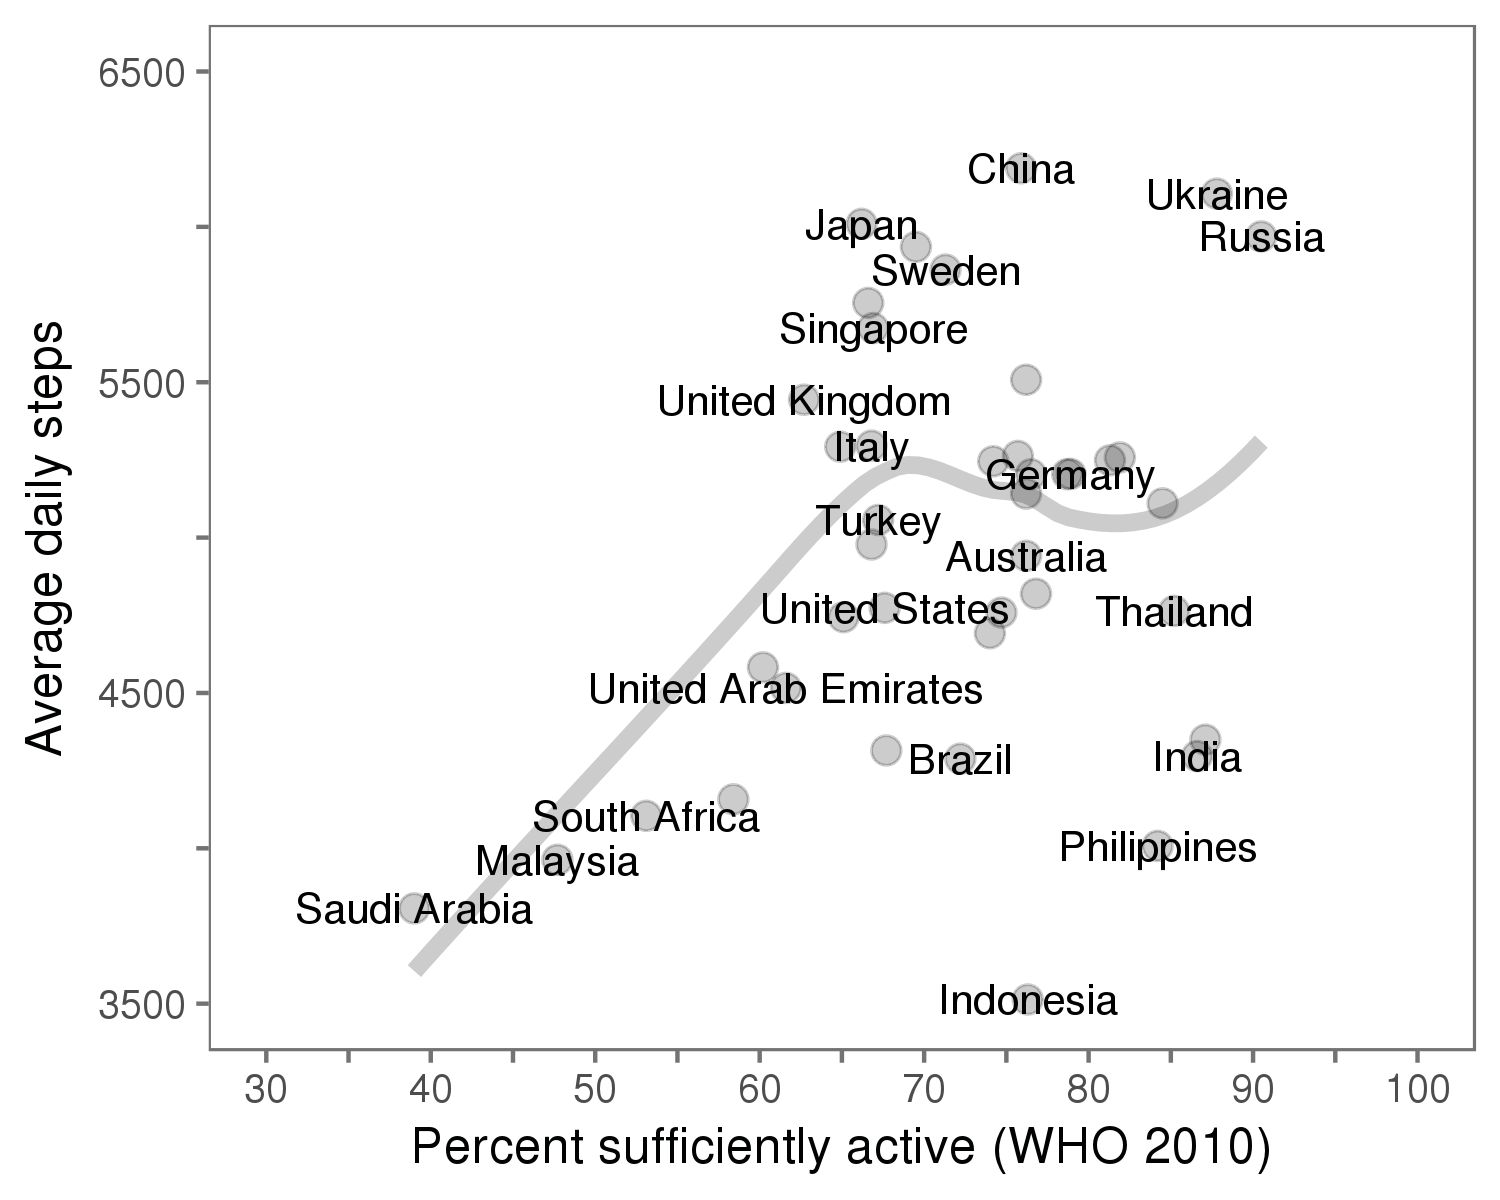

In [4]:
# Note: WHO data does not include Hong Kong, Taiwan, Isreal, and Switzerland (see warning message).

p <- ggplot(df, aes(who_2010_sufficiently_active_agestd_both, steps_mean,
                   label=country))
p <- p + geom_smooth(aes(group=1), method="loess",span=.9,  se = F, size=2.0, color="gray80", alpha=1.0, method.args=list(family="symmetric"))
p <- p + geom_point(alpha=.2, size=3.0)
p <- p + geom_text(check_overlap = T, size=3.5)
p <- p + ylab("Average daily steps") + xlab("Percent sufficiently active (WHO 2010)")
p <- p + guides(color=FALSE) + guides(size=FALSE)
p <- p + theme_few(base_size=12, base_family="Helvetica")
p <- p + scale_colour_brewer(palette = "Set2")

# xticks
ticks = seq(30,100,by=5) 
labels = rep("", length(ticks))
labels[seq(1, length(labels), 2)] = sprintf("%.0f", ticks[seq(1, length(labels), 2)])
p <- p + scale_x_continuous(breaks=ticks, labels=labels, limits=c(30,100))
# yticks
ticks = seq(3500,6500,by=500) 
labels = rep("", length(ticks))
labels[seq(1, length(labels), 2)] = sprintf("%.0f", ticks[seq(1, length(labels), 2)])
p <- p + scale_y_continuous(breaks=ticks, labels=labels, limits=c(3500,6500))
p

ggsave(filename="../output/edfig2a.pdf", plot=p, width=4, height=3)

We find a correlation of r=0.3194 between the two measures (p < 0.05). 

In [5]:
cor.test(df$who_2010_sufficiently_active_agestd_both, df$steps_mean)


	Pearson's product-moment correlation

data:  df$who_2010_sufficiently_active_agestd_both and df$steps_mean
t = 2.1314, df = 40, p-value = 0.03925
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.01708635 0.56814463
sample estimates:
      cor 
0.3193593 
